# Autoencoders Implementation

- Saurabh Raj 12034140
- Sonu Kumar 12041470

In [13]:
import keras
from keras import layers
from keras.layers import Dense, Input, Flatten,\
                                    Reshape, LeakyReLU as LR,\
                                    Activation, Dropout
from keras.models import Model, Sequential
from matplotlib import pyplot as plt

In [16]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# Convolutional Autoencoder

In [6]:
import keras
from keras import layers

input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [8]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
469/469 [==============================] - 107s 227ms/step - loss: 0.1678 - val_loss: 0.1390
Epoch 2/10
469/469 [==============================] - 92s 196ms/step - loss: 0.1315 - val_loss: 0.1241
Epoch 3/10
469/469 [==============================] - 87s 185ms/step - loss: 0.1214 - val_loss: 0.1167
Epoch 4/10
469/469 [==============================] - 88s 187ms/step - loss: 0.1156 - val_loss: 0.1134
Epoch 5/10
469/469 [==============================] - 89s 189ms/step - loss: 0.1120 - val_loss: 0.1093
Epoch 6/10
469/469 [==============================] - 88s 188ms/step - loss: 0.1095 - val_loss: 0.1073
Epoch 7/10
469/469 [==============================] - 84s 179ms/step - loss: 0.1075 - val_loss: 0.1054
Epoch 8/10
469/469 [==============================] - 86s 184ms/step - loss: 0.1061 - val_loss: 0.1043
Epoch 9/10
469/469 [==============================] - 86s 184ms/step - loss: 0.1048 - val_loss: 0.1028
Epoch 10/10
469/469 [==============================] - 86s 183ms/step - 

313/313 [==============================] - 6s 18ms/step


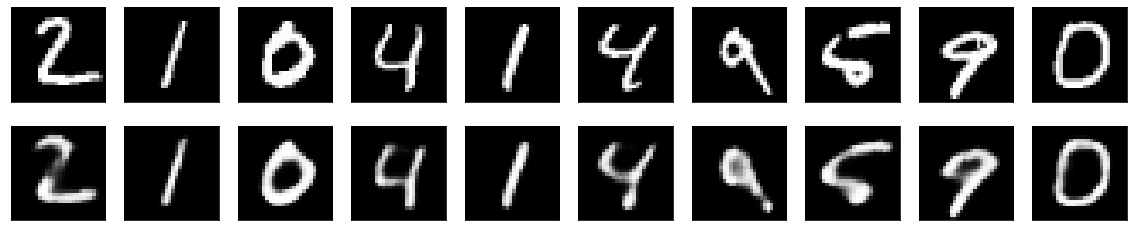

In [10]:

decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Sparse Autoencoder

In [ ]:
from keras import regularizers
# creating autoencoder model
encoder_inputs = keras.Input(shape = (28,28,1))

conv1 = layers.Conv2D(16, (3,3), activation = 'relu', padding = "SAME")(encoder_inputs)
pool1 = layers.MaxPooling2D(pool_size = (2,2), strides = 2)(conv1)
conv2 = layers.Conv2D(32, (3,3), activation = 'relu', padding = "SAME")(pool1)
pool2 = layers.MaxPooling2D(pool_size = (2,2), strides = 2)(conv2)
flat = layers.Flatten()(pool2)

enocder_outputs = layers.Dense(32, activation = 'relu', activity_regularizer=regularizers.l1(10e-5))(flat)

#upsampling in decoder

dense_layer_d = layers.Dense(7*7*32, activation = 'relu')(enocder_outputs)
output_from_d = Reshape((7,7,32))(dense_layer_d)
conv1_1 = layers.Conv2D(32, (3,3), activation = 'relu', padding = "SAME")(output_from_d)
upsampling_1 = layers.Conv2DTranspose(32, 3, padding='same', activation='relu', strides=(2, 2))(conv1_1)
upsampling_2 = layers.Conv2DTranspose(16, 3, padding='same', activation='relu', strides=(2, 2))(upsampling_1)
decoded_outputs = layers.Conv2DTranspose(1, 3, padding='same', activation='relu')(upsampling_2)

autoencoder = keras.Model(encoder_inputs, decoded_outputs)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
469/469 [==============================] - 94s 198ms/step - loss: 0.2246 - val_loss: 0.1787
Epoch 2/10
469/469 [==============================] - 89s 190ms/step - loss: 0.1592 - val_loss: 0.1567
Epoch 3/10
469/469 [==============================] - 87s 187ms/step - loss: 0.1499 - val_loss: 0.1327
Epoch 4/10
469/469 [==============================] - 85s 181ms/step - loss: 0.1376 - val_loss: 0.1291
Epoch 5/10
469/469 [==============================] - 88s 187ms/step - loss: 0.1536 - val_loss: 0.1410
Epoch 6/10
469/469 [==============================] - 87s 186ms/step - loss: 0.1478 - val_loss: 0.1263
Epoch 7/10
469/469 [==============================] - 87s 184ms/step - loss: 0.1410 - val_loss: 0.1344
Epoch 8/10
469/469 [==============================] - 87s 185ms/step - loss: 0.1282 - val_loss: 0.1434
Epoch 9/10
469/469 [==============================] - 88s 188ms/step - loss: 0.1558 - val_loss: 0.1434
Epoch 10/10
469/469 [==============================] - 87s 186ms/step - l

313/313 [==============================] - 7s 21ms/step


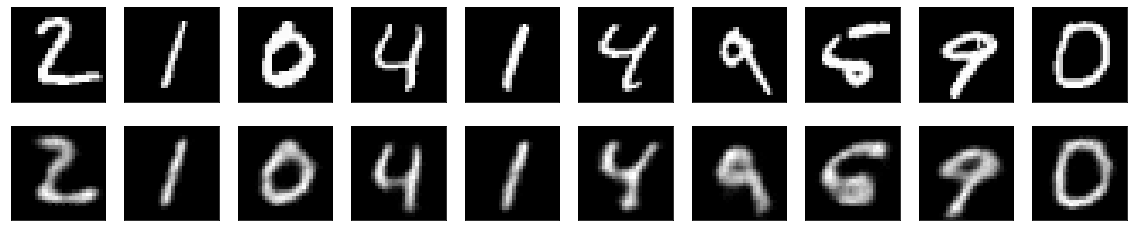

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Variational Autoencoder

In [24]:
import tensorflow as tf

In [ ]:
class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon


In [ ]:
latent_dim = 2

encoder_inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 14, 14, 32)   320         ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 7, 7, 64)     18496       ['conv2d[0][0]']                 
                                                                                                  
 flatten (Flatten)              (None, 3136)         0           ['conv2d_1[0][0]']               
                                                                                            

In [ ]:
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(7 * 7 * 64, activation="relu")(latent_inputs)
x = layers.Reshape((7, 7, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_1 (Dense)             (None, 3136)              9408      
                                                                 
 reshape (Reshape)           (None, 7, 7, 64)          0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 64)       36928     
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 28, 28, 32)       18464     
 ranspose)                                                       
                                                                 
 conv2d_transpose_2 (Conv2DT  (None, 28, 28, 1)        289 

In [ ]:

class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(data, reconstruction), axis=(1, 2)
                )
            )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }


In [ ]:
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
mnist_digits = np.concatenate([x_train, x_test], axis=0)
mnist_digits = np.expand_dims(mnist_digits, -1).astype("float32") / 255

vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())
vae.fit(mnist_digits, epochs=10, batch_size=128)

Epoch 1/10
547/547 [==============================] - 101s 180ms/step - loss: 200.9984 - reconstruction_loss: 184.5483 - kl_loss: 4.8359
Epoch 2/10
547/547 [==============================] - 92s 168ms/step - loss: 172.1470 - reconstruction_loss: 164.2092 - kl_loss: 6.0734
Epoch 3/10
547/547 [==============================] - 94s 172ms/step - loss: 166.3471 - reconstruction_loss: 159.1459 - kl_loss: 6.3242
Epoch 4/10
547/547 [==============================] - 94s 171ms/step - loss: 163.2060 - reconstruction_loss: 156.1429 - kl_loss: 6.4341
Epoch 5/10
547/547 [==============================] - 93s 170ms/step - loss: 161.3237 - reconstruction_loss: 154.5267 - kl_loss: 6.4741
Epoch 6/10
547/547 [==============================] - 92s 167ms/step - loss: 159.7110 - reconstruction_loss: 153.1243 - kl_loss: 6.4917
Epoch 7/10
547/547 [==============================] - 93s 171ms/step - loss: 158.7899 - reconstruction_loss: 152.1722 - kl_loss: 6.5179
Epoch 8/10
547/547 [===========================

1/1 [==============================] - 0s 16ms/step


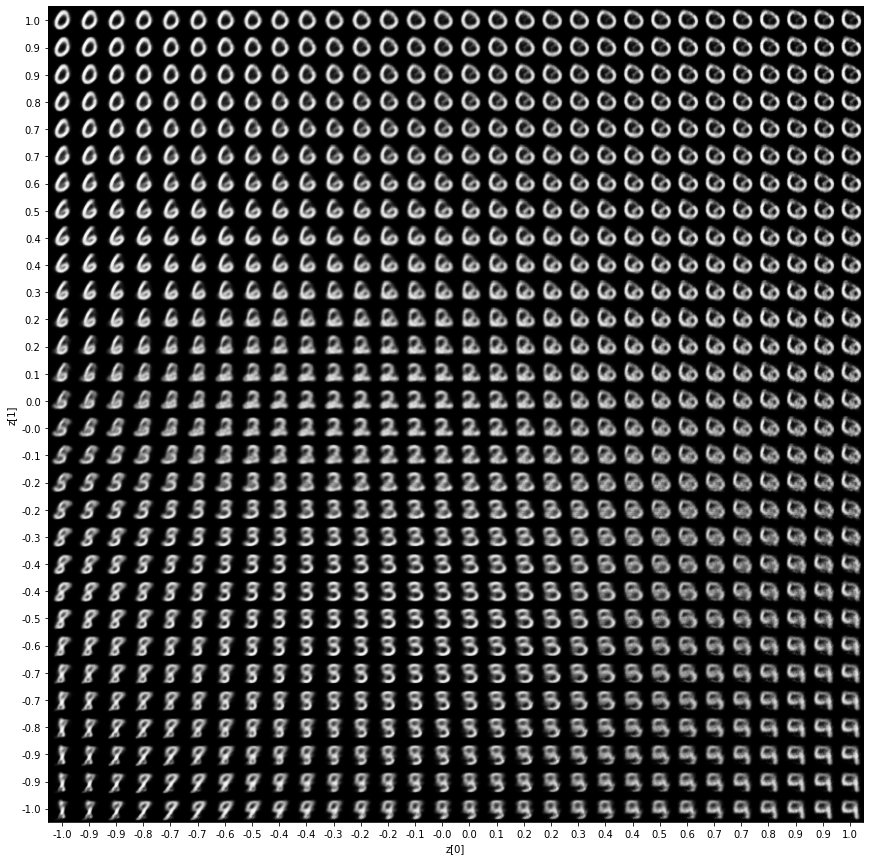

In [ ]:
import matplotlib.pyplot as plt


def plot_latent_space(vae, n=30, figsize=15):
    # display a n*n 2D manifold of digits
    digit_size = 28
    scale = 1.0
    figure = np.zeros((digit_size * n, digit_size * n))
    # linearly spaced coordinates corresponding to the 2D plot
    # of digit classes in the latent space
    grid_x = np.linspace(-scale, scale, n)
    grid_y = np.linspace(-scale, scale, n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = vae.decoder.predict(z_sample)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[
                i * digit_size : (i + 1) * digit_size,
                j * digit_size : (j + 1) * digit_size,
            ] = digit

    plt.figure(figsize=(figsize, figsize))
    start_range = digit_size // 2
    end_range = n * digit_size + start_range
    pixel_range = np.arange(start_range, end_range, digit_size)
    sample_range_x = np.round(grid_x, 1)
    sample_range_y = np.round(grid_y, 1)
    plt.xticks(pixel_range, sample_range_x)
    plt.yticks(pixel_range, sample_range_y)
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.imshow(figure, cmap="Greys_r")
    plt.show()


plot_latent_space(vae)

1875/1875 [==============================] - 7s 4ms/step


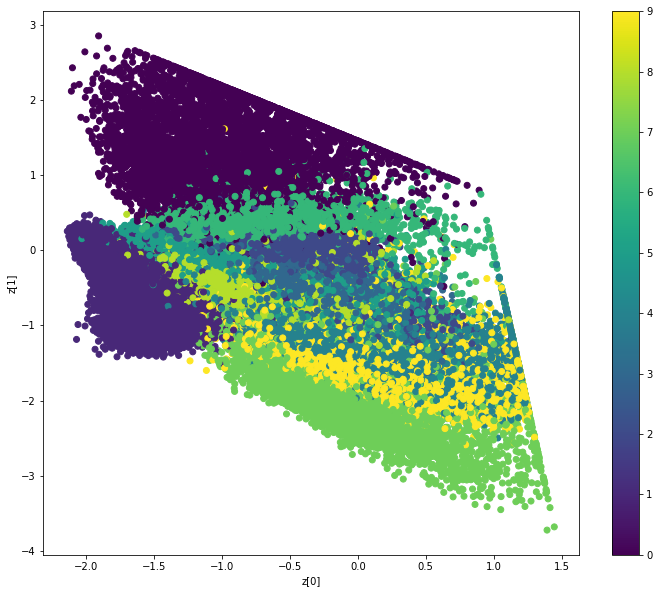

In [ ]:

def plot_label_clusters(vae, data, labels):
    # display a 2D plot of the digit classes in the latent space
    z_mean, _, _ = vae.encoder.predict(data)
    plt.figure(figsize=(12, 10))
    plt.scatter(z_mean[:, 0], z_mean[:, 1], c=labels)
    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.show()


(x_train, y_train), _ = keras.datasets.mnist.load_data()
x_train = np.expand_dims(x_train, -1).astype("float32") / 255

plot_label_clusters(vae, x_train, y_train)

# Deep Autoencoder

In [22]:
input_img = keras.Input(shape=(28,28,1))
flatten=layers.Flatten()(input_img)
encoded = layers.Dense(128, activation='relu')(flatten)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)
decoded=Reshape((28, 28,1))(decoded)

In [23]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 6s 21ms/step - loss: 0.2400 - val_loss: 0.1636
Epoch 2/100
235/235 [==============================] - 5s 20ms/step - loss: 0.1490 - val_loss: 0.1366
Epoch 3/100
235/235 [==============================] - 5s 20ms/step - loss: 0.1321 - val_loss: 0.1259
Epoch 4/100
235/235 [==============================] - 5s 23ms/step - loss: 0.1232 - val_loss: 0.1187
Epoch 5/100
235/235 [==============================] - 6s 25ms/step - loss: 0.1178 - val_loss: 0.1145
Epoch 6/100
235/235 [==============================] - 5s 21ms/step - loss: 0.1140 - val_loss: 0.1110
Epoch 7/100
235/235 [==============================] - 5s 22ms/step - loss: 0.1104 - val_loss: 0.1077
Epoch 8/100
235/235 [==============================] - 5s 22ms/step - loss: 0.1075 - val_loss: 0.1045
Epoch 9/100
235/235 [==============================] - 5s 23ms/step - loss: 0.1050 - val_loss: 0.1025
Epoch 10/100
235/235 [==============================] - 5s 22ms/step - loss: 0.103

313/313 [==============================] - 1s 3ms/step


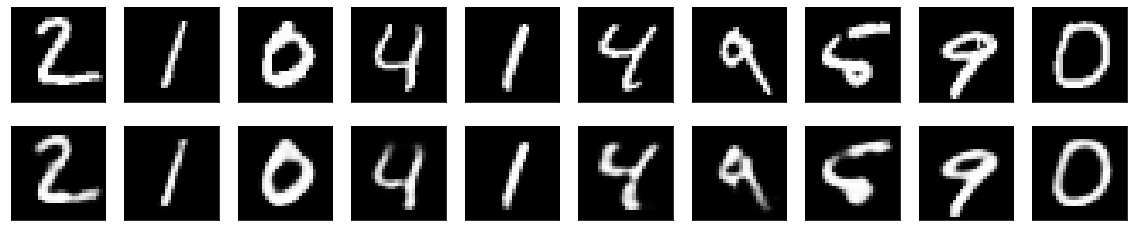

In [25]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Contractive Autoencoder

In [ ]:
import os
import argparse
import torch
import torch.utils.data
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from torchvision import datasets, transforms
# import pdb
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="1"
print("Imported all libraries successfully!")

Imported all libraries successfully!


In [ ]:
class Args:
    batch_size=128
    epochs=19
    no_cuda='store_true'
    seed=1
    log_interval=10

In [ ]:
args=Args()
args.cuda = not args.no_cuda and torch.cuda.is_available()

In [ ]:

torch.manual_seed(args.seed)
if args.cuda:
    torch.cuda.manual_seed(args.seed)

kwargs = {'num_workers': 5, 'pin_memory': True} if args.cuda else {}

train_loader = torch.utils.data.DataLoader(
	datasets.MNIST('data', train=True, download=True,
		transform=transforms.ToTensor()),
	batch_size=args.batch_size, shuffle=True, **kwargs)

test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data', train=False, transform=transforms.ToTensor()),
    batch_size=args.batch_size, shuffle=True, **kwargs)

lam = 1e-4

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
class CAE(nn.Module):
    def __init__(self):
        super(CAE, self).__init__()

        self.fc1 = nn.Linear(784, 400, bias = False) # Encoder
        self.fc2 = nn.Linear(400, 784, bias = False) # Decoder

        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()


    def encoder(self, x):
        h1 = self.relu(self.fc1(x.view(-1, 784)))
        return h1

    def decoder(self,z):
        h2 = self.sigmoid(self.fc2(z))
        return h2

    def forward(self, x):
            h1 = self.encoder(x)
            h2 = self.decoder(h1)
            return h1, h2
# Writing data in a grid to check the quality and progress
    def samples_write(self, x, epoch):
        _, samples = self.forward(x)
        #pdb.set_trace()
        samples = samples.data.cpu().numpy()[:16]
        fig = plt.figure(figsize=(4, 4))
        gs = gridspec.GridSpec(4, 4)
        gs.update(wspace=0.05, hspace=0.05)
        for i, sample in enumerate(samples):
            ax = plt.subplot(gs[i])
            plt.axis('off')
            ax.set_xticklabels([])
            ax.set_yticklabels([])
            ax.set_aspect('equal')
            plt.imshow(sample.reshape(28, 28), cmap='Greys_r')
        if not os.path.exists('out/'):
            os.makedirs('out/')
        plt.savefig('out/{}.png'.format(str(epoch).zfill(3)), bbox_inches='tight')
        #self.c += 1
        plt.close(fig)

In [ ]:
mse_loss = nn.BCELoss(size_average = False)


def loss_function(W, x, recons_x, h, lam):
    """Compute the Contractive AutoEncoder Loss
    See reference below for an in-depth discussion:
      #1: https://contractiveae.blogspot.com/2020/03/hands-on-contractive-autoencoders.html
    Args:
        `W` (FloatTensor): (N_hidden x N), where N_hidden and N are the
          dimensions of the hidden units and input respectively.
        `x` (Variable): the input to the network, with dims (N_batch x N)
        recons_x (Variable): the reconstruction of the input, with dims
          N_batch x N.
        `h` (Variable): the hidden units of the network, with dims
          batch_size x N_hidden
        `lam` (float): the weight given to the jacobian regulariser term
    Returns:
        Variable: the (scalar) CAE loss
    """
    mse = mse_loss(recons_x, x)
    # Since: W is shape of N_hidden x N. So, we do not need to transpose it as
    # opposed to #1
    dh = h * (1 - h) # Hadamard product produces size N_batch x N_hidden
    # Sum through the input dimension to improve efficiency, as suggested in #1
    w_sum = torch.sum(Variable(W)**2, dim=1)
    # unsqueeze to avoid issues with torch.mv
    w_sum = w_sum.unsqueeze(1) # shape N_hidden x 1
    contractive_loss = torch.sum(torch.mm(dh**2, w_sum), 0)
    return mse + contractive_loss.mul_(lam)


model = CAE()
optimizer = optim.Adam(model.parameters(), lr = 0.0001)

if args.cuda:
    model.cuda()

def train(epoch):
    model.train()
    train_loss = 0

    for idx, (data, _) in enumerate(train_loader):
        data = Variable(data)
        if args.cuda:
            data = data.cuda()

        optimizer.zero_grad()

        hidden_representation, recons_x = model(data)

        # Get the weights
        # model.state_dict().keys()
        # change the key by seeing the keys manually.
        # (In future I will try to make it automatic)
        W = model.state_dict()['fc1.weight']
        loss = loss_function(W, data.view(-1, 784), recons_x,
                             hidden_representation, lam)

        loss.backward()
        train_loss += loss.data[0]
        optimizer.step()

        if idx % args.log_interval == 0:
            print('Train epoch: {} [{}/{}({:.0f}%)]\t Loss: {:.6f}'.format(
                  epoch, idx*len(data), len(train_loader.dataset),
                  100*idx/len(train_loader),
                  loss.data[0]/len(data)))


    print('====> Epoch: {} Average loss: {:.4f}'.format(
         epoch, train_loss / len(train_loader.dataset)))
    model.samples_write(data,epoch)

for epoch in range(args.epochs):
    train(epoch)

/usr/local/lib/python3.8/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Train epoch: 0 [0/60000(0%)]	 Loss: 544.615051
Train epoch: 0 [1280/60000(2%)]	 Loss: 529.036133
Train epoch: 0 [2560/60000(4%)]	 Loss: 504.700073
Train epoch: 0 [3840/60000(6%)]	 Loss: 462.652985
Train epoch: 0 [5120/60000(9%)]	 Loss: 410.494843
Train epoch: 0 [6400/60000(11%)]	 Loss: 357.206177
Train epoch: 0 [7680/60000(13%)]	 Loss: 306.176117
Train epoch: 0 [8960/60000(15%)]	 Loss: 270.701538
Train epoch: 0 [10240/60000(17%)]	 Loss: 249.694946
Train epoch: 0 [11520/60000(19%)]	 Loss: 239.799805
Train epoch: 0 [12800/60000(21%)]	 Loss: 230.730743
Train epoch: 0 [14080/60000(23%)]	 Loss: 222.967117
Train epoch: 0 [15360/60000(26%)]	 Loss: 222.151260
Train epoch: 0 [16640/60000(28%)]	 Loss: 217.131104
Train epoch: 0 [17920/60000(30%)]	 Loss: 215.600861
Train epoch: 0 [19200/60000(32%)]	 Loss: 216.532806
Train epoch: 0 [20480/60000(34%)]	 Loss: 207.502502
Train epoch: 0 [21760/60000(36%)]	 Loss: 203.015961
Train epoch: 0 [23040/60000(38%)]	 Loss: 206.067551
Train epoch: 0 [24320/60000(